# Assignment I: Credit Card Fraud Detection 

## Task: automatically detect transactions that are likely to be frauds  

The Data for this assignment is fron the following  Kaggle challenge: https://www.kaggle.com/mlg-ulb/creditcardfraud

### Problem description
**Context**
It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.

## Data
The datasets contains transactions made by credit cards in September 2013 by european cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, ... V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.





In [ ]:
#download data
!unzip creditcard.csv.zip

Archive:  creditcard.csv.zip
replace creditcard.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

## Task 1: Problem Statement
Discuss the problem setting and the first implecations of the given data set... 
* What assumptions can we make about the data?
* What problems are we expecting?

In [ ]:
#Assumption 1 : Value  1 is fraud transactions, and 0 is not fraud transaction.

#Problems: The data is clearly unbalanced 

# Task 2: First Data Analysis and Cleaning
* Import the data to a Pandas DataFrame
* Run first simple statistics and visualizations
* Is there a need to clean the data? If yes, do so...

see: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import norm
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from matplotlib import gridspec
data = pd.read_csv("creditcard.csv")

In [ ]:
data.head()

In [ ]:
print(data.shape)
print(data.describe())

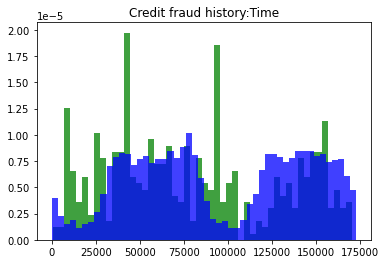

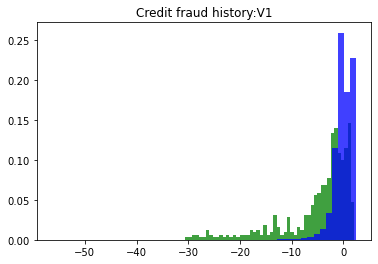

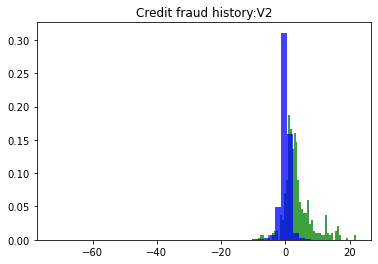

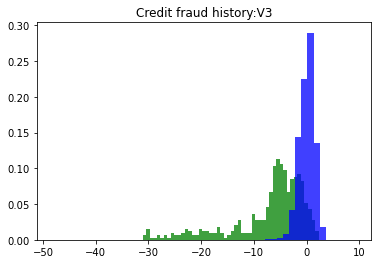

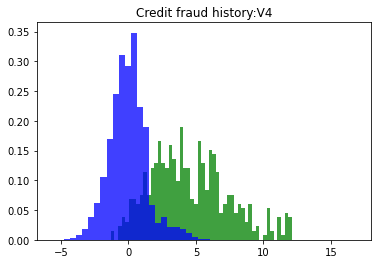

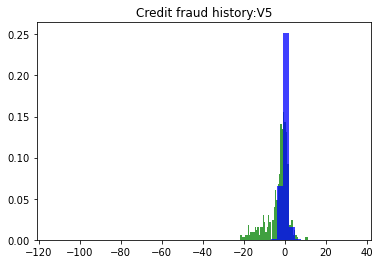

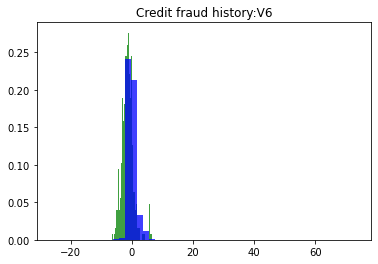

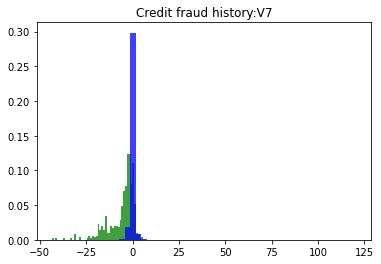

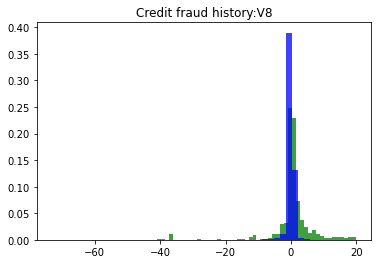

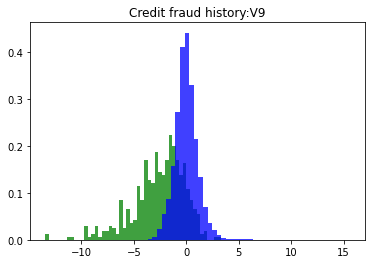

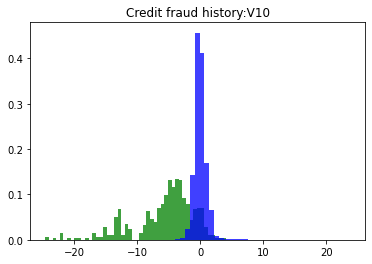

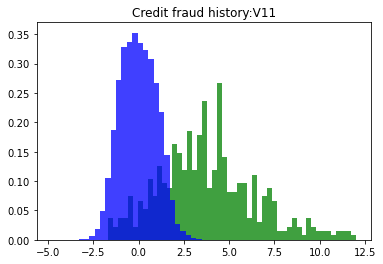

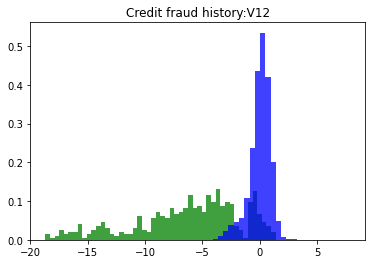

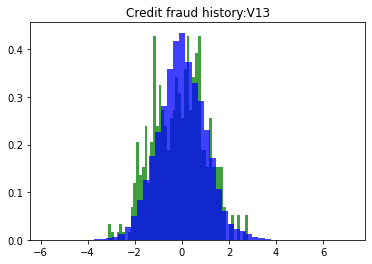

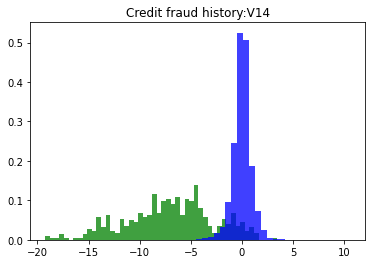

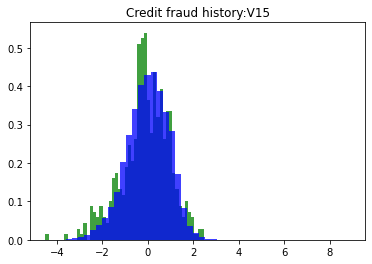

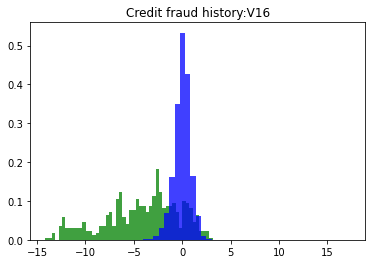

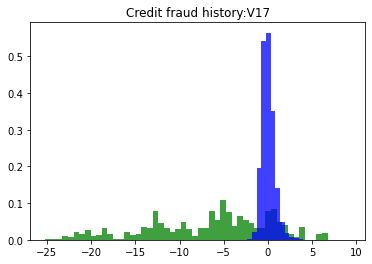

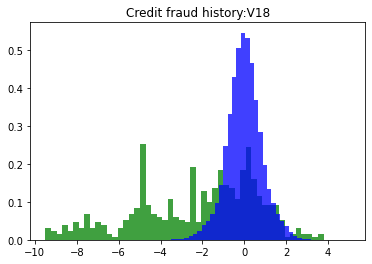

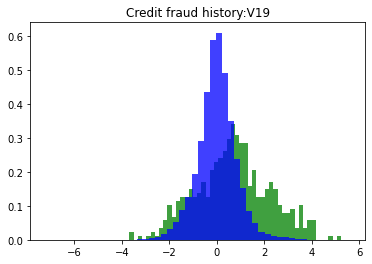

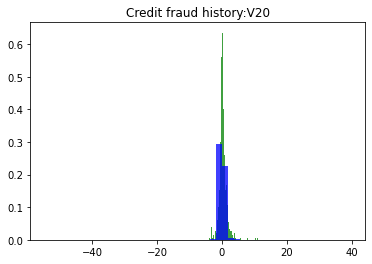

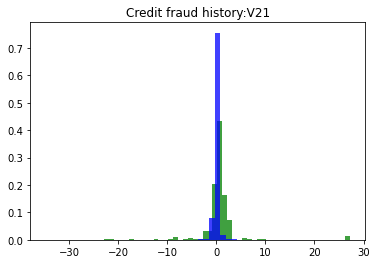

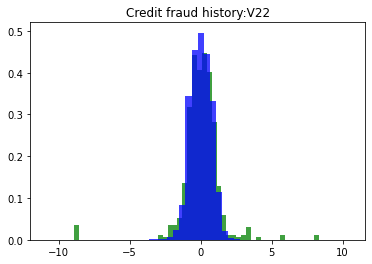

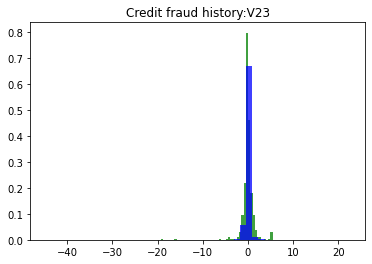

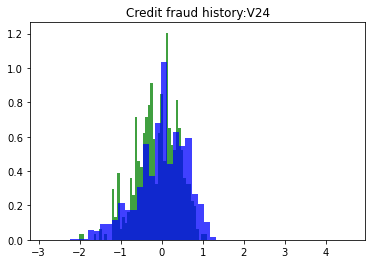

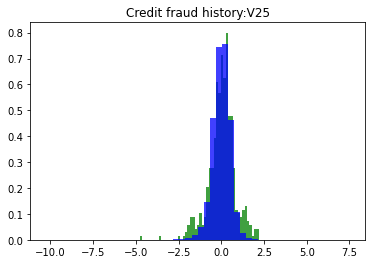

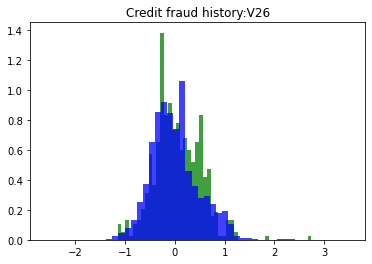

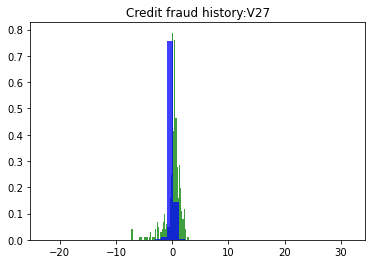

In [10]:
# Do statistics and visualization
all_features = []
all_targets = []
column_data = data.iloc[:,0:28].columns

#column_data
#x
for i, c in enumerate(data[column_data]):
    #Test how many figures list down
    #print (i)
    ax = plt.subplots()
    #Test how many figures printed
    #print (ax)
    plt.hist(data[c][data.Class == 1], bins=50, density=True, facecolor='g', alpha=0.75)
    plt.hist(data[c][data.Class == 0], bins=50, density=True, facecolor='b', alpha=0.75)
    plt.title("Credit fraud history:" + str(c))
    plt.show()
    

In [62]:
#Clean the data

#Step 1 
#Checking null column
nullStatus = data.isnull()


#Return true of false (All return false! therefore  this case we don`t have any null values)
nullStatus

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
284803,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
284804,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
284805,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [60]:
#For more security  we can retrive sum. it also return zero null values
print (nullStatus.isnull().sum())

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [66]:
# Any missing values? it returns true or false. For this case it return False.
print (data.isnull().values.any())

# Total number of missing values. It also return zero. 
print (data.isnull().sum().sum())

#My answer: This given data set,  it not exist any null values. So I hope we don`t need perform any cleaning mechanism! 

False
0


# Task 3: Dataset Preparation + Validation
* Should we pepare a validation set? Or use other approaches? -> do so.
* How should we meassure the quality of our model?

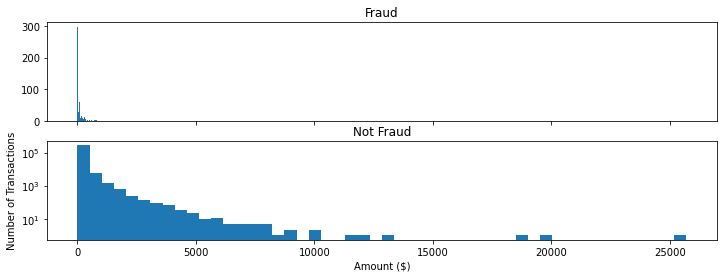

In [35]:

#My note: Prepare a validation set
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12,4))

bins = 50

ax1.hist(data.Amount[data.Class == 1], bins=bins)
ax1.set_title('Fraud')
ax2.hist(data.Amount[data.Class == 0], bins=bins)
ax2.set_title('Not Fraud')


plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.yscale('log')
plt.show()


In [36]:

print('Fraud')
print(data.Amount[data.Class==1].describe())
print()
print('Not Fraud')
print(data.Amount[data.Class==0].describe())
print()

Fraud
count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

Not Fraud
count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64



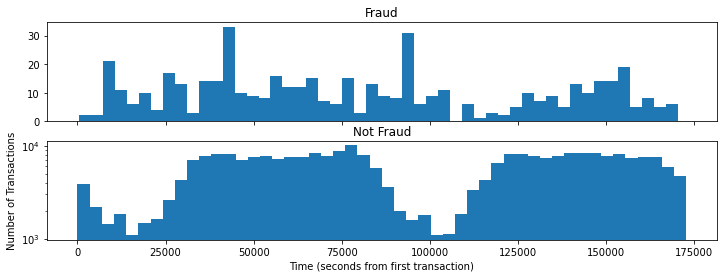

In [42]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12,4))

bins = 50

ax1.hist(data.Time[data.Class == 1], bins=bins)
ax1.set_title('Fraud')
ax2.hist(data.Time[data.Class == 0], bins=bins)
ax2.set_title('Not Fraud')


plt.xlabel('Time (seconds from first transaction)')
plt.ylabel('Number of Transactions')
plt.yscale('log')
plt.show()


In [85]:
data['amt_normalize'] = ((data.Amount) - (data.Amount.mean()))/(data.Amount.std())
data_new = data.copy()
y = data.Class
X = data.drop(columns = ['Class','Amount','Time'])
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33, random_state=0)
X_org = X
y_org = y


# instantiate a logistic regression model, and fit with X_train and y_train
model = LogisticRegression()
model = model.fit(X_train, y_train)


# check the accuracy on the training set
print("accuracy on the training set:",model.score(X_train, y_train))

# check the accuracy on the test dataset
print("accuracy on the testing set:",model.score(X_test, y_test))

accuracy on the training set: 0.9992296404988995
accuracy on the testing set: 0.9991488184536159


# Task 4: Train a Gaussian Naive Bayes Classifier
* Train and evaluate the model using the approach from task 3
* Diskuss the results -> possible improovements?

See: https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html#sklearn.naive_bayes.GaussianNB
